In [39]:
from sklearn import datasets
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = np.zeros(3*N).reshape(N,3).astype(np.float32)
for i in range(N):
    Y2[i, Y[i]] = 1.0
index = np.arange(N)
xtrain = X[index[index % 2 != 0], :]
ytrain = Y2[index[index % 2 != 0], :]
xtest = X[index[index % 2 == 0], :]
yans = Y[index[index % 2 == 0]]

In [16]:
class IrisChain(Chain):
    def __init__(self):
        super(IrisChain, self).__init__(
        l1 = L.Linear(4,6),
        l2 = L.Linear(6, 3),) # Linear: 全結合
        
    def __call__(self, x, y):
        return F.mean_squared_error(self.fwd(x), y)
    
    def fwd(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = self.l2(h1)
        return h2

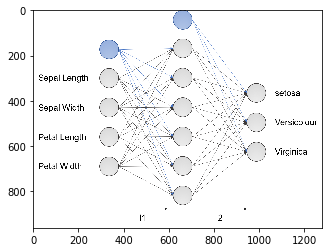

In [40]:
im = Image.open('nn.png', "r")
plt.imshow(np.asarray(im))

In [18]:
model = IrisChain()
optimizer = optimizers.Adam()
optimizer.setup(model)

In [19]:
for i in range(10000):
    x = Variable(xtrain)
    y = Variable(ytrain)
    model.zerograds()
    loss = model(x, y)
    loss.backward()
    optimizer.update()

In [20]:
xt = Variable(xtest)
yt = model.fwd(xt)
ans = yt.data
nrow, ncol = ans.shape
ok = 0
for i in range(nrow):
    cls = np.argmax(ans[i, :])
    if cls == yans[i]:
        ok += 1

In [21]:
print("%d / %d = %f" %(ok, nrow, (ok*1.0)/nrow))

72 / 75 = 0.960000
